# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** Smartcab did not move at all. I was able to observe two different kind of rewards:

* for standing still on a red light
* for not entering crossroads on a green light but with an obstacle immediately behind the crossing

Also I noticed that the Agent recieved penalty for standing still on a green light without obstacles behind the intersection.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** I chose to describe following flags in **agent.py**: *num_dummies* in Environment class, *epsilon* and *alpha* in LearningAgent class.

* *num_dummies* flag defines the number of dummy cars in the simulation space thus simulating city traffic;
* *epsilon* is a random exploration factor. If *epsilon* close to 1, the Agent selects its actions completely at random, if *epsilon* close to 0, the agent tends to select the action that is best by now from reward matrix (given by attribute Q in LearningAgent class from **agent.py**) thus following the learned behavior.
* *learning rate* is a weight assigned to the new info, so *learning rate* defines the balance between acquired info and info that Agent already has. Valid range for *learning rate* is [0:1]. If *LR* equal to 0 then the Agent does not learn at all, whereas if *LR* equal 1 then Q-value estimate is exclusively defined by newly acquired estimates calculated in the direction of the newly observed state and reward. Reasonable learning rates must be small enough (literature even suggests dynamic LR reduction) in order to guarantee Q-learning algorithm convergence.

When an Agent performs an action **Environment.act()** method is called.

The difference between **Simulator.render_text()** and **Simulator.render()** is that **render_text()** method only prints model states to console, whereas **render()** provides GUI for the model in a separate window.

**Planner.next_waypoint()** method executes East-West comparison earlier than North-South. So East-West will be considered first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


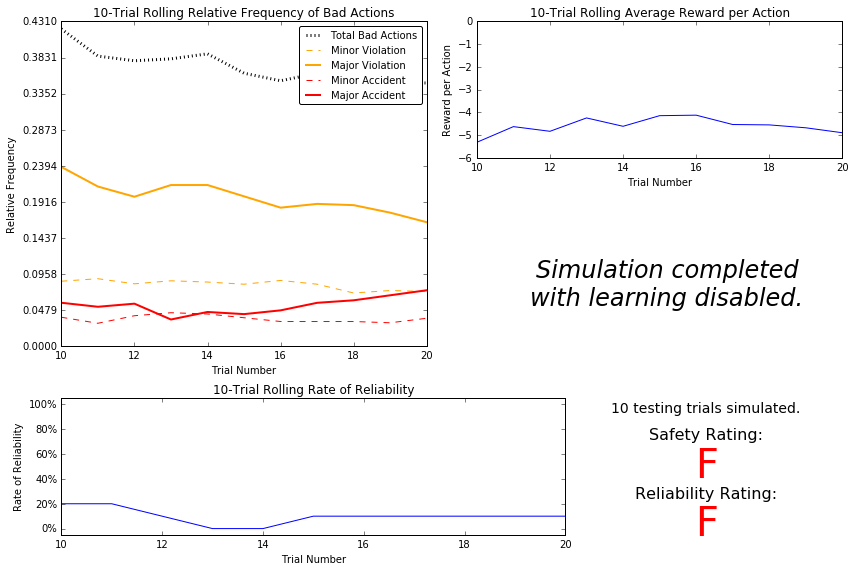

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
* about 40% (from 40% to 43% to be exact) of agent's decisions are marked as 'bad'. Approximately every third 'bad' decision  classified as accident. Totally about 5% of ALL decisions caused Minor Accidents and about 9% af ALL decisions caused Major Accidents. Accident rate was evaluated with default *num_dummies=100* value.
* I could think about reliability rate for random driving as a lower bound for reliability that one must expect from any model. But random driving reliability equals to zero, so the idea is inapplicable in practice.
* from 'Average reward' figure we can observe that average reward per action is constantly negative and well below zero. It suggests thorough consideration of default penalty scheme in **environment.py**. Given that penalty varies from -5 for Minor violation to -40 for Major accident (**Environment.act()** method, Line No 351) whereas maximum default reward per turn is 2 (same method, line 335), we can state that agents are mostly penalized for minor violations.
* I don't see any definitely rising trends on 'Relative frequency of bad actions' figure for any parameters. Actually it would be surprising if any up or down trends were present since our agent just acts at random without learning.
* It's hard to consider Smartcab with 40% 'Bad action' rate and about 15% accident rate as safe. 15% accident rate suggests that on average it needed only 7 time turns for a Smartcab to drive into road accident. If we tried to create a real life analogy for a time turn in a model, than I'd say that time turn equals approximately 30 seconds (time required on average in a big city to drive from one crossroads to another). So one could claim that average accident free interval of random model Smartcab in a real city would be about 7 * 30 = 210 seconds, or about 3,5 minutes. No safety at all. So 'Safety rating' F and 'Reliability rating' F are absolutely adequate.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** *waypoint* and *inputs* are most relevant features for learning both safety and efficiency. *Waypoint* directly influences efficiency by pointing to the optimal direction towards the goal, whereas *inputs* connected directly with safety since it returns nearby traffic lights states and informs the Agent about surrounding traffic.

*Deadline* is relevant to efficiency but connected with safety inversely. Approaching deadline may stimulate the Agent to 'consiously' select potentially dangerous moves leading to penalties in exchange for the reward of completing the mission in time. So *deadline* seems inappropriate for effective safety learning.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** Let write explicitely number of all possible states for *waypoint* and *inputs* (with all its substates).

|Feature|No of possible states|
|-------|--------------|
|waypoint|   **3** (Forward-Right-Left)  |
|*inputs*     |
|lights| **2** (red-green)|
|left| **4** (Forward-Right-Left-None) |
|right| **4** (Forward-Right-Left-None)|
|oncoming| **4** (Forward-Right-Left)|

So the possible state space size is 3 x 2 x 4 x 4 x 4 = 384 states.

In each state we have four possible policies (Forward-Right-Left-None) to explore. So total number of unique policies for all states is 384*4 = 1536. During the learning we are expected to test every policy several times (optimal number of visits depends on learning rate). Even if we were satisfied with a single evaluation for every unique policy, it is equivalent to a task of random selection of every ball at least once from an urn with 1536 numbered balls with probability, say, 0.95. This observation suggests thousands of trial rounds, though I failed to perform exact calculation. We can cut sample space significantly by refusing from observing dummy cars to the right and subsequently reducing total number of policies available to 384. But it is still thousands of trials to achieve evaluation for every unique policy.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

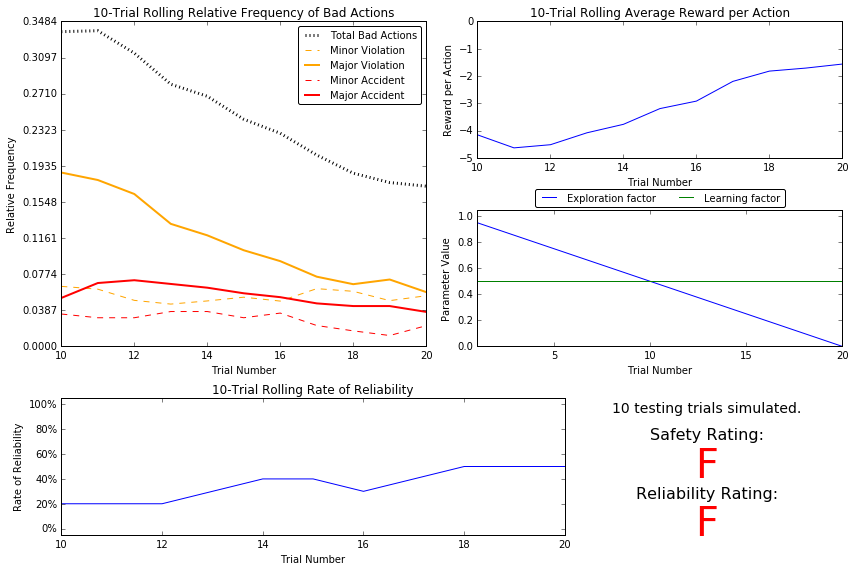

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** Main point to mention is that 'Relative frequency of bad actions' figure shows that the learning really works. All types of violations and minor accidents tend to decline with increasing No of training trials. Also reward per action figure shows positive trend that means the Agent is learning to behave in accordance with rewarding schema defined in a model. Poor safety and reliability scores seem to be due to insufficient number of training (since one can reasonably expect declining trends for bad actions to continue with the growth of training trials number). Actually, even 50 training trials often allow to achieve C/C score, but I kept low No of training attempts in order to keep resulting figures of random and default Q-learn agents comparable.

* Apart from overall scoring, Reliability Rolling Rate figure shows insufficient growth for random and default Q-learn Agents. But in case of default Q-learning Agent we can reasonably expect better reliability with increased training.
* The Agent did exactly 20 training trials, since for default initial epsilon value 1.0, suggested by briefing above down rate 0.05 and tolerance 0.05 one could expect exactly 1.0 / 0.05 = 20 attempts.
* Yes, I expected to see decaying linear function, that equals zero at trial No 20 for epsilon and I really saw it in parameter panel.
* Yes, total No of bad actions decreased as No of training trials increased and average reward shows increasing trend. The only trend that shows no enough decline is Major Accident rate but the reason for it is that low number of training attempts does not allow the model to explore sample space satisfactory since Major Accidents rate mostly defined by random configurations of dummy cars on intersections and the agent just have no sufficient number of attempts to get penalized for those accidents often enough.
* Scoring for the particular Q-learning attempt is poor, but only because of insufficient training as were mentioned above.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

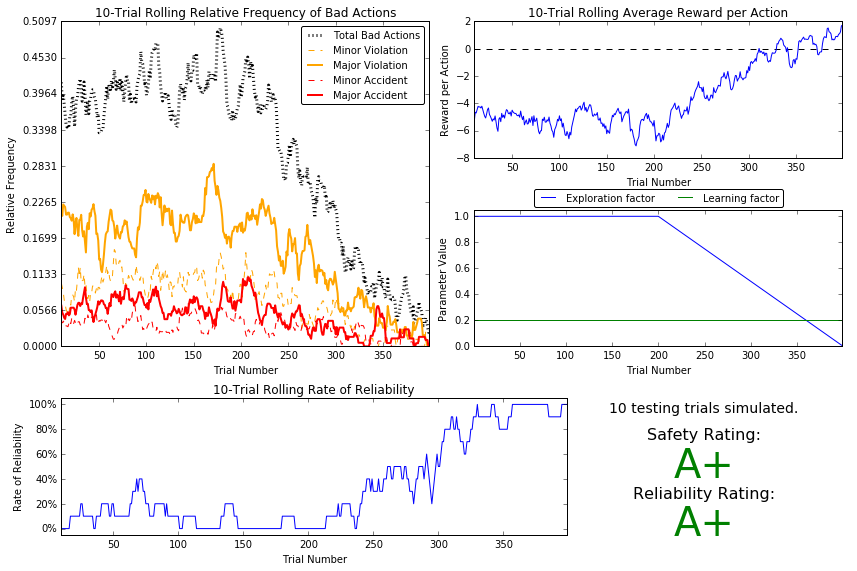

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 
* I used simple decay function that uses maximum Exploration factor for 50% of available attempts and than linearly decays Exploration factor towards zero. Despite of simplicity it produces stable and good results for more than 350 training trials. The key observation is that one better keep Exploration factor at maximum rate long enough from the start of training in order to capture sufficient number of penalties for inappropriate behavior, or, in other words, just by random exploration of sample space. At the second half of the training the Agent starts to gather information about 'good' behaviour thus creating a policy for following waypoints from the planned route. Actually on initial modelling stages I thought about fancier sigmoid-like decay functions which started with exploration factor about 1.0 and than twisting towards exploration factor of 0.0 after half of the training available, but it turned out they required thorough parameter tweaking since sigmoids reach near zero values too fast thus disallowing long enough 'non-random' policy learning sequence.
* In order to achieve stable A/A+ results the Agent requires at least 350 training trials. Results shown above took 400 training trials.
* Epsilon tolerance does not matter much with linear decaying function, it just has to be small enough. In that particular case I used 0.005 tolerance. I used relatively low constant learning rate 0.2 in order to somehow discount high penalties for occasional major accidents during training.
* Optimized agent shows drastic improvement in comparison with default Q-learner, but sufficient amount of improvement is connected with much bigger number of training trials.
* Yes, since the model shows acceptable reliability, positive average reward per action and satisfactory safety, I'd say that the agent learned an appropriate policy.
* Yes, but to some extent. I'd try to give a model a lot more training, for example 800, 1200 and 1600 training trials and than look at average reward rate and reliability in order to select optimal number of training trials for capturing sufficient amount of inappropriate behavior cases thus allowing to get even closer to 100% reliability and safety rate.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** I'll describe examples of an optimal policy in terms of tuples of the following form: (target waypoint, road lights, state to the left, state forward, state to the right, optimal behavior).
* (forward, red, left, forward, None, NONE) - in case we need to go forward, we have to stop at a red light
* (forward, green, None, forward, right, FORWARD) - in case we need to go forward on a green light, we have to go forward no matter other cars are doing
* (right, red, None, None, None, RIGHT) - according to US traffic rules we can turn right on a red light if we do not create obstacle to other cars that are moved from the left on their green light
* (right, red, forward, None, None, NONE) - turning right on the red light in this case would cause an accident
* (left, green, left, forward, None, LEFT) - it's a subtle point in a model, since direct interpretation suggests an accident while turning left, but the reward system suggests the Agent is able to somehow pass the car that moves forward from the opposite direction

Some weighted examples of correct policy from the model:

['right', 'green', 'None', 'forward', 'forward']
 * forward : 0.16
 * right : 1.44
 * None : -3.76
 * left : 0.45
 
MaxQ = 1.44, so the Agent expected to turn right and it'd do it.

['left', 'red', 'forward', 'forward', 'left']
 * forward : -7.82
 * right : -3.90
 * None : 1.08
 * left : -8.03
 
MaxQ is 1.08, so we select None. Any action except None would cause an accident in this case.

['forward', 'green', 'left', 'right', 'left']
 * forward : 0.74
 * right : 0.00
 * None : 0.00
 * left : -0.10
 
MaxQ is 0.74 so we select Forward. It's ok to go forward there.

But still there are few examples of non-optimal behavior in the model. Here they are:

['forward', 'green', 'forward', 'right', 'right']
 * forward : 0.00
 * right : 0.22
 * None : 0.00
 * left : 0.00

MaxQ is 0.22, so we select Right (instead of optimal Forward). It's an example of insufficient training. The agent would turn right just because during exploration phase in a training it missed the chance to obtain higher reward for following  towards a waypoint.

['left', 'green', 'left', 'left', 'right']
 * forward : 0.47
 * right : 0.00
 * None : 0.00
 * left : 0.00

MaxQ is 0.47, so we select Forward (instead of optimal Left). Same issue. It'd be better to go left in that case.

So the policy learned by the Agent could be classified as suboptimal only.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** Characteristics that prevent Smartcab from using future rewards are as follows:
* Smartcab is short-sighted by its definition and have no chance to look upon different intersections except the current one. So it is impossible to predict the state even for the next intersection, thus making attempts for future rewards prediction useless.
* stochastic nature of traffic. There are lots of dummy cars in the model, that show absolutely random behaviour. So it is impossible to the model to predict future states based on previous ones, since the previous states are just random.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.